# Exploratory Data Analysis of ~20k tweets from 9/11/2016 to 12/12/2016.

   Today Demonetisation is something that has affected every single person in the country, in a mostly direct way. Though are no official stats on the impact it had on the economy in the last 40 days or so I thought it would be interesting to explore the general sentiment on Twitter, to understand what folks from diverse walks of life think.
  
  It was easier said than done. Depending on the way you see it, Twitter data is either entirely usesless or is very difficult to classify. Though I certainly dont think Twitter as the gold standard of the country's opinion, I still valid  opinions are voiced there and it's worth taking a look. 
  
 I compiled close to 20,000 tweets, from 9/11/2016 to 12/12/2016, classified sentiments using Indico.io's sentiment classifier and also hand classified a few tweets written in Hinglish.
 
 These were the questions I was trying to get answered with these tweets:
 * What was the average sentiment over these 34 days. 
 * A word-cloud of both positive/negative tweets. 
 * How did sentiments change over a period of time in India's top 10 cities by population. What were folks outside india saying and how did that change over time?
 * Where did the most positive tweets come from? Where did the most negative tweets come from?
 * What were Twitter's "influencers" saying about this move? And how did that change over time?


In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import indicoio as indico
import matplotlib.pyplot as plt
import collections
from collections import OrderedDict
import plotly
from wordcloud import WordCloud
import re

%matplotlib inline
sns.set(style="whitegrid")

In [2]:
df = pd.read_csv('tweets.csv')

In [3]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True, errors = 'ignore')

In [4]:
df.columns

Index(['user id', 'name', 'handle', 'date', 'retweets', 'favorites', 'text',
       'id', 'permalink', 'language', 'followers_count', 'location',
       'sentiment'],
      dtype='object')

In [5]:
df.head()

,user id,name,handle,date,retweets,favorites,text,id,permalink,language,followers_count,location,sentiment
0,7.108627e+17,The gamer,VenkateshaPanc2,2016-11-09 23:38:24,0.0,0.0,If common man is supporting the decision why c...,7.964142e+17,https://twitter.com/VenkateshaPanc2/status/796...,en,6.0,"Indore, India",0.712256
1,7.291956e+07,Uma Kant Singh,umakantsingh_in,2016-11-09 23:38:42,0.0,0.0,"#DeMonetisation,Not govt of common man,PM who ...",7.964142e+17,https://twitter.com/umakantsingh_in/status/796...,en,455.0,New Delhi,0.433632
2,2.381901e+08,Antony bothagar,Antonybothagar,2016-11-09 23:38:46,0.0,1.0,I am already suffering to get changes for ₹ 10...,7.964142e+17,https://twitter.com/Antonybothagar/status/7964...,en,76.0,NaN,0.844959
3,2.433278e+09,Abhishek Sharma,skyneeldotcom,2016-11-09 23:38:53,1.0,1.0,#APPSC #Recruitment 2016 – Apply Online for 98...,7.964143e+17,https://twitter.com/skyneeldotcom/status/79641...,en,6288.0,NaN,0.568757
4,3.246635e+09,abdul rahman,RahmanAbdul2603,2016-11-09 23:39:21,0.0,0.0,#DeMonetisation almst everybody knows fr a mar...,7.964144e+17,https://twitter.com/RahmanAbdul2603/status/796...,en,48.0,"Saharanpur, India",0.080881


## Lets first look at overall sentiment over the course of these 34 days.

In [6]:
## Get average sentiment for each week. For that, return Dataframes for each week.  
def search(df, *words):  #1
    return df[np.logical_or.reduce([df['date'].str.contains(word) for word in words])]
week1 = search(df,"2016-11-09","2016-11-10","2016-11-11","2016-11-12","2016-11-13","2016-11-14","2016-11-15","2016-11-16")

## Maybe we can look at the data in a slightly granular way. Mean sentiment for each day. 
### A scatter plot would help.

In [32]:
day_count = df['date'].unique().tolist()
day_count = [i.split(' ', 1)[0] for i in day_count] #remove time-stamps.
day_count = list(OrderedDict.fromkeys(day_count))
mean_sentiment_each_day = []
for i in range(0, 34):
    mean_sentiment_each_day.append((search(df,day_count[i])['sentiment'].mean())*100) ## 
print(mean_sentiment_each_day)



[53.136832903225809, 52.921829355149171, 50.774063636363628, 48.179133333333333, 51.16975626598466, 53.476719999999986, 50.039012499999998, 51.350087678339818, 51.913394965986392, 47.948271313672933, 52.364179829545456, 48.739098203592818, 52.228293522267208, 48.062430821917815, 51.705255329949239, 49.913779966887411, 47.832414985994397, 55.673494999999981, 39.815657142857141, 49.845762499999999, 51.119342201834861, 45.726437500000003, 45.608518881118883, 47.380484290540537, 49.258282573099414, 50.329545744680857, 47.727182420091324, 49.08963748458693, 47.717728712871285, 44.266404385964911, 47.598505787781356, 48.914792917166871, 48.785451050679853, 47.431779556898285]


In [33]:
## Create a new dataframe for plotting it as a scatter plot. 
mean_sentiment_df = pd.DataFrame()
mean_sentiment_df['day_count'] = list(range(0,34))
mean_sentiment_df['mean_sentiment'] = mean_sentiment_each_day
mean_sentiment_df.head()

,day_count,mean_sentiment
0,0,53.136833
1,1,52.921829
2,2,50.774064
3,3,48.179133
4,4,51.169756


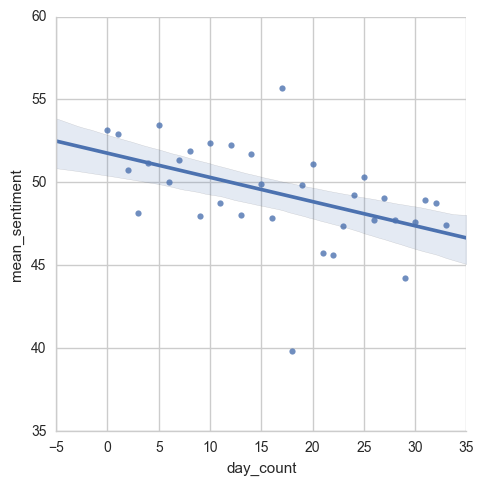

In [40]:
sns.lmplot(x="day_count", y="mean_sentiment", data=mean_sentiment_df)

### There's definitely a decline in sentiment over 34 days. It would also be interesting to see how many tweets were in each interval. 

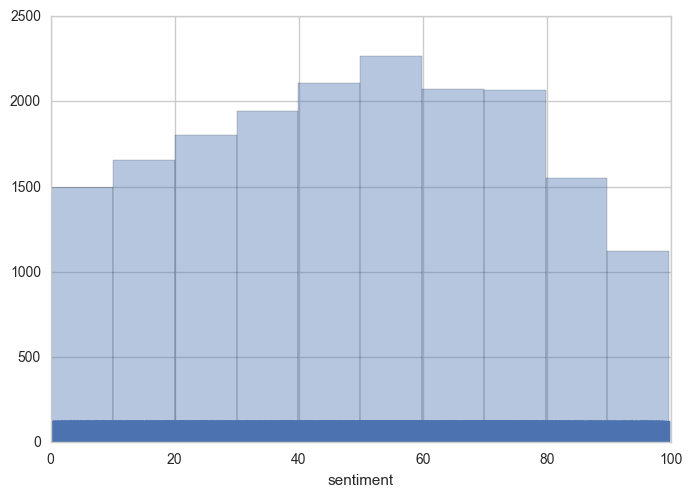

In [49]:
sns.distplot((df['sentiment']*100), bins=10, kde=False, rug=True);

## Let's try and visualise a word cloud for all positive tweets(score > 0.5) and negative tweets(score < 0.5)

In [59]:
# a dataframe of positive and negative with just the 'text' and 'sentiment' column.
only_text_and_sentiments = df[['text','sentiment']]
positive_tweets = only_text_and_sentiments[only_text_and_sentiments['sentiment'] > 0.5]
positive_tweets = positive_tweets.sort_values('sentiment',ascending=False)
negative_tweets = only_text_and_sentiments[only_text_and_sentiments['sentiment'] < 0.5]
negative_tweets = negative_tweets.sort_values('sentiment',ascending=False)
print(positive_tweets.head())
print(negative_tweets.head())

                                                    text  sentiment
2090   #DeMonetisation has developed  d faith dat i c...   0.997693
13797  #Demonetisation It's proved, in 2-3 quarters e...   0.996759
673    @narendramodi @PMOIndia Yet another decisive a...   0.996316
2175   Loving unbiased coverage of #DeMonetisation by...   0.996234
10431  @tjoseph0010 this is one of the most comprehen...   0.995809
                                                    text  sentiment
6307   @SitaramYechury stop testing the patience of a...   0.499998
11391  Please feed the people in the #DeMonetisation ...   0.499986
5199   #InternationalMensDay #book #books Book #demon...   0.499972
5216   #InternationalMensDay #book #books Book #demon...   0.499972
16458  In investing biz, investors have several alter...   0.499907


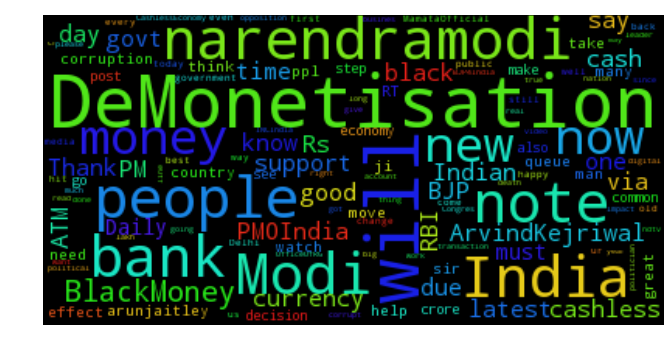

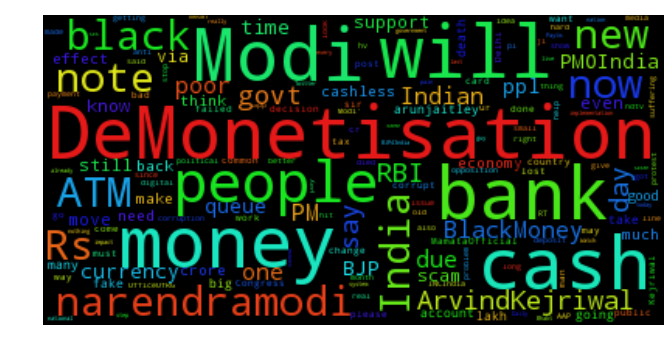

In [70]:
## Make it DRY before publishing it. 

positive_tweet_text =''.join(map(str, positive_tweets['text'].tolist()))
positive_tweet_text = re.sub(r"http\S+", "", positive_tweet_text)
positive_tweet_text = re.sub(r"pic.twitter\S+", "", positive_tweet_text)
positive_wc = WordCloud().generate(positive_tweet_text)
plt.imshow(positive_wc)
plt.axis("off")
plt.show()
negative_tweet_text =''.join(map(str, negative_tweets['text'].tolist()))
negative_tweet_text = re.sub(r"http\S+", "", negative_tweet_text) # Sanitising URLs a bit. Need to make the code DRY here.
negative_tweet_text = re.sub(r"pic.twitter\S+", "", negative_tweet_text)
negative_wc = WordCloud().generate(negative_tweet_text)
plt.imshow(negative_wc)
plt.axis("off")
plt.show()
